In [8]:
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import Conv2D, MaxPooling2D
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
# from tensorflow.keras.optimizers import Adam

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import os
import cv2

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
# from keras.models import Sequential 
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
# from keras.layers import Dropout, Flatten, Dense  
from tensorflow.keras import applications
# from tensorflow.keras.utils.np_utils import to_categorical  
# import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
# %matplotlib inline
import math  
import datetime
import time

In [9]:
os.listdir('../FYP')

['.ipynb_checkpoints',
 'dataset',
 'ODIR-5K_Training_Annotations(Updated)_V2.xlsx',
 'output',
 'testing_image',
 'training_image',
 'train_csv.csv',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'x.pickle',
 'y.pickle']

In [10]:
IMAGE_SIZE = 96
IMAGE_CHANNELS = 3

SAMPLE_SIZE = 80000 # the number of images we use from each of the two classes

In [11]:
print(len(os.listdir('../FYP/training_image')))
print(len(os.listdir('../FYP/testing_image')))
original_dataset_train_dir = '../FYP/training_image'
original_dataset_test_dir = '../FYP/testing_image'

7000
1000


In [12]:
df_data = pd.read_csv('../FYP/train_csv.csv')

# removing this image because it caused a training error previously
# df_data[df_data['ID'] != 'dd6dfed324f9fcb6f93f46f32fc800f2ec196be2']

# # # removing this image because it's black
# df_data[df_data['ID'] != '9369c7278ec8bcc6c880d99194de09fc2bd4efbe']


print(df_data.shape)

(3500, 15)


In [13]:
df_data['M'].value_counts()
df_data.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot?moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [14]:
# Path of images
IMAGE_PATH = '../FYP/train_image/' 
# categories = ["N","D","G","C","A","H","M","O"]

# Inialiaze the categories og train
NORMAL_train = []
DIABETES_train = []
GLYCOMA_train = []
CATARACT_train = []
AMD_train = []
HYPERTENSION_train = []
MYOPIA_train = []
OTHER_train = []


# Inialiaze the categories og test
NORMAL_test = []
DIABETES_test = []
GLYCOMA_test = []
CATARACT_test = []
AMD_test = []
HYPERTENSION_test = []
MYOPIA_test = []
OTHER_test = []

# Data load from dataset
normal_fundus_from_dataset = df_data["N"]
diabetes_fundus_from_dataset = df_data["D"]
glycoma_fundus_from_dataset = df_data["G"]
cataract_fundus_from_dataset = df_data["C"]
amd_fundus_from_dataset = df_data["A"]
hypertension_fundus_from_dataset = df_data["H"]
myopia_fundus_from_dataset = df_data["M"]
other_fundus_from_dataset = df_data["O"]


left_image = df_data["Left-Fundus"]
right_image = df_data["Right-Fundus"]
# print(myopia_fundus)
print(len(df_data))
for i in range(0,len(df_data)):
#     print(myopia_fundus[i])
    if normal_fundus_from_dataset[i] == 1:
        NORMAL_train.append(left_image[i])
        NORMAL_train.append(right_image[i])
    if diabetes_fundus_from_dataset[i] == 1:
        DIABETES_train.append(left_image[i])
        DIABETES_train.append(right_image[i])
    
    if glycoma_fundus_from_dataset[i] == 1:
        GLYCOMA_train.append(left_image[i])
        GLYCOMA_train.append(right_image[i])
    
    if cataract_fundus_from_dataset[i] == 1:
        CATARACT_train.append(left_image[i])
        CATARACT_train.append(right_image[i])
    
    if amd_fundus_from_dataset[i] == 1:
        AMD_train.append(left_image[i])
        AMD_train.append(right_image[i])
    
    if hypertension_fundus_from_dataset[i] == 1:
        HYPERTENSION_train.append(left_image[i])
        HYPERTENSION_test.append(right_image[i])
    
    if myopia_fundus_from_dataset[i] == 1:
        MYOPIA_train.append(left_image[i])
        MYOPIA_train.append(right_image[i])
    
    if other_fundus_from_dataset[i] == 1:
        OTHER_train.append(left_image[i])
        OTHER_train.append(right_image[i])
    

ee = len(NORMAL_train)+len(MYOPIA_train)+len(CATARACT_train)+len(HYPERTENSION_train)+len(OTHER_train)+len(GLYCOMA_train)+len(AMD_train)+len(DIABETES_train)
print(ee)
# print(len(CATARACT_train))
#     if myopia_fundus[i] == 1:
#         myopia.append(left_image[i])
#         myopia.append(right_image[i])
#     elif cataract_fundus[i] == 1:
#         cataract.append(left_image[i])
#         cataract.append(right_image[i])
#     elif normal_fundus[i] == 1:
#         normal.append(left_image[i])
#         normal.append(right_image[i])
# # dra
# for i in len(df_data):
#     if myopia_fundus=="1":
#         print("helo")
# comparison_column = np.where(df["col1"] == df["col2"], True, False)

# path1 = os.path.join(IMAGE_PATH,left_fundus[0])
# for left in left_fundus:
#     path = os.path.join(IMAGE_PATH,left)
#     print(path)
    



3500
8127


In [1]:
# for i in range((len(df_data)-500),len(df_data)):
# #     print(myopia_fundus[i])
#     if normal_fundus_from_dataset[i] == 1:
#         NORMAL_test.append(left_image[i])
#         NORMAL_test.append(right_image[i])
#     if diabetes_fundus_from_dataset[i] == 1:
#         DIABETES_test.append(left_image[i])
#         DIABETES_test.append(right_image[i])
    
#     if glycoma_fundus_from_dataset[i] == 1:
#         GLYCOMA_test.append(left_image[i])
#         GLYCOMA_test.append(right_image[i])
    
#     if cataract_fundus_from_dataset[i] == 1:
#         CATARACT_test.append(left_image[i])
#         CATARACT_test.append(right_image[i])
    
#     if amd_fundus_from_dataset[i] == 1:
#         AMD_test.append(left_image[i])
#         AMD_test.append(right_image[i])
    
#     if hypertension_fundus_from_dataset[i] == 1:
#         HYPERTENSION_test.append(left_image[i])
#         HYPERTENSION_test.append(right_image[i])
    
#     if myopia_fundus_from_dataset[i] == 1:
#         MYOPIA_test.append(left_image[i])
#         MYOPIA_test.append(right_image[i])
    
#     if other_fundus_from_dataset[i] == 1:
#         OTHER_test.append(left_image[i])
#         OTHER_test.append(right_image[i])


In [16]:
df_data.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot?moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1
3,3,66,Male,3_left.jpg,3_right.jpg,normal fundus,branch retinal artery occlusion,0,0,0,0,0,0,0,1
4,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1


In [17]:
len(df_data)

3500

In [ ]:
# for categ in categories:
#     path = os.path.join(IMAGE_PATH,categ)
#     print(path)
#     for image in os.listdir(path):
        
#         img_arrow=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
#         plt.imshow(img_arrow,cmap="grey")
#         plt.show()
#         break
#     break

In [9]:
base_dir = '../FYP/dataset'
os.mkdir(base_dir)


In [10]:
train_dir = os.path.join(base_dir, 'training_image')
os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'testing_image')
os.mkdir(test_dir)

In [13]:
# Train Directory
train_cataract_dir = os.path.join(train_dir, 'Cataract')
os.mkdir(train_cataract_dir)

train_myopia_dir = os.path.join(train_dir, 'Myopia')
os.mkdir(train_myopia_dir)

train_normal_dir = os.path.join(train_dir, 'Normal')
os.mkdir(train_normal_dir)

train_diabetes_dir = os.path.join(train_dir, 'Diabetes')
os.mkdir(train_diabetes_dir)

train_hypertensio_dir = os.path.join(train_dir, 'Hypertension')
os.mkdir(train_hypertensio_dir)

train_glycoma_dir = os.path.join(train_dir, 'Glycauma')
os.mkdir(train_glycoma_dir)

train_other_dir = os.path.join(train_dir, 'Other')
os.mkdir(train_other_dir)
# Testing Directory
# test_cataract_dir = os.path.join(test_dir, 'Cataract')
# os.mkdir(test_cataract_dir)

# test_myopia_dir = os.path.join(test_dir, 'Myopia')
# os.mkdir(test_myopia_dir)

# test_normal_dir = os.path.join(test_dir, 'Normal')
# os.mkdir(test_normal_dir)

# test_diabetes_dir = os.path.join(test_dir, 'Diabetes')
# os.mkdir(test_diabetes_dir)

# test_hypertensio_dir = os.path.join(test_dir, 'Hypertension')
# os.mkdir(test_hypertensio_dir)

# test_glycoma_dir = os.path.join(test_dir, 'Glycauma')
# os.mkdir(test_glycoma_dir)

# test_other_dir = os.path.join(test_dir, 'Other')
# os.mkdir(test_other_dir)


In [14]:
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# print(fnames)
    
for cataract in CATARACT_train:
    src = os.path.join(original_dataset_train_dir, cataract)
    dst = os.path.join(train_cataract_dir, cataract)
    shutil.copyfile(src, dst)
# for cataract in CATARACT_test:
#     src = os.path.join(original_dataset_train_dir, cataract)
#     dst = os.path.join(test_cataract_dir, cataract)
#     shutil.copyfile(src, dst)


In [15]:
for myopia in MYOPIA_train:
    src = os.path.join(original_dataset_train_dir, myopia)
    dst = os.path.join(train_myopia_dir, myopia)
    shutil.copyfile(src, dst)
# for myopia in MYOPIA_test:
#     src = os.path.join(original_dataset_train_dir, myopia)
#     dst = os.path.join(test_myopia_dir, myopia)
#     shutil.copyfile(src, dst)


In [16]:
for normal in NORMAL_train:
    src = os.path.join(original_dataset_train_dir, normal)
    dst = os.path.join(train_normal_dir, normal)
    shutil.copyfile(src, dst)
# for normal in NORMAL_test:
#     src = os.path.join(original_dataset_train_dir, normal)
#     dst = os.path.join(test_normal_dir, normal)
#     shutil.copyfile(src, dst)


In [17]:
for diabetes in DIABETES_train:
    src = os.path.join(original_dataset_train_dir, diabetes)
    dst = os.path.join(train_diabetes_dir, diabetes)
    shutil.copyfile(src, dst)
# for diabetes in DIABETES_test:
#     src = os.path.join(original_dataset_train_dir, diabetes)
#     dst = os.path.join(test_diabetes_dir, diabetes)
#     shutil.copyfile(src, dst)

In [18]:
for glycauma in GLYCOMA_train:
    src = os.path.join(original_dataset_train_dir, glycauma)
    dst = os.path.join(train_glycoma_dir, glycauma)
    shutil.copyfile(src, dst)
# for glycauma in GLYCOMA_test:
#     src = os.path.join(original_dataset_train_dir, glycauma)
#     dst = os.path.join(test_glycoma_dir, glycauma)
#     shutil.copyfile(src, dst)

In [19]:
for hypertension in HYPERTENSION_train:
    src = os.path.join(original_dataset_train_dir, hypertension)
    dst = os.path.join(train_hypertensio_dir, hypertension)
    shutil.copyfile(src, dst)
# for hypertension in HYPERTENSION_test:
#     src = os.path.join(original_dataset_train_dir, hypertension)
#     dst = os.path.join(test_hypertensio_dir, hypertension)
#     shutil.copyfile(src, dst)

In [20]:
for other in OTHER_train:
    src = os.path.join(original_dataset_train_dir, other)
    dst = os.path.join(train_other_dir, other)
    shutil.copyfile(src, dst)
# for other in OTHER_test:
#     src = os.path.join(original_dataset_train_dir, other)
#     dst = os.path.join(test_other_dir, other)
#     shutil.copyfile(src, dst)

In [ ]:
print('total training Cataract images:', len(os.listdir(train_cataract_dir)))

print('total training Myopia images:', len(os.listdir(train_myopia_dir)))

print('total training Normal images:', len(os.listdir(train_normal_dir)))

print('total training Diabetes images:', len(os.listdir(train_diabetes_dir)))

print('total training Glycoama images:', len(os.listdir(train_glycoma_dir)))

print('total training Hypertension images:', len(os.listdir(train_hypertensio_dir)))

print('total training Other images:', len(os.listdir(train_other_dir)))



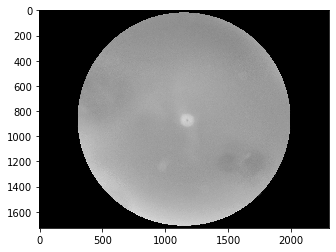

In [21]:
class_names = ['Cataract', 'Diabetes', 'Glycauma', 'Hypertension', 'Myopia',
               'Normal', 'Other']

DATA_DIR = "../FYP/Dataset/training_image"

for categry in class_names:
    path = os.path.join(DATA_DIR,categry)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap ="gray")
        plt.show()
        break
    break


In [22]:
print(img_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
print(img_array.shape)

(1728, 2304)


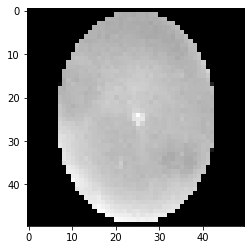

In [24]:
# IMG_SIZE = 50
# new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
# plt.imshow(new_array,cmap = 'gray')
# plt.show()

IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

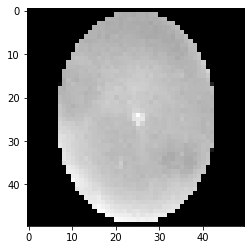

In [25]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [26]:
# training_data = []

# def create_training_data():
#     for category in CATEGORIES:  # do dogs and cats

#         path = os.path.join(DATADIR,category)  # create path to dogs and cats
#         class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

#         for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
#             try:
#                 img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
#                 new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
#                 training_data.append([new_array, class_num])  # add this to our training_data
#             except Exception as e:  # in the interest in keeping the output clean...
#                 pass
#             #except OSError as e:
#             #    print("OSErrroBad img most likely", e, os.path.join(path,img))
#             #except Exception as e:
#             #    print("general exception", e, os.path.join(path,img))

# create_training_data()

# print(len(training_data))

training_data = []
def create_training_data():
    for categry in class_names:
        path = os.path.join(DATA_DIR,categry)
        class_num = class_names.index(categry)
        for image in os.listdir(path):
#         for image in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()

In [27]:
print(len(training_data))

7799


In [28]:
import random
random.shuffle(training_data)

In [29]:
for sample in training_data[:10]:
    print(sample[1])

5
5
5
2
5
1
1
5
1
2


In [30]:
x=[]
y=[]

In [31]:
for features,label in training_data:
    x.append(features)
    y.append(label)

print(x[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# for feature,label in training_data:
#     x.append(feature)
#     y.append(label)
# x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


In [32]:
import pickle
pickle_out = open("x.pickle","wb")
pickle.dump(x,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [33]:
pickle_in = open("x.pickle","rb")
x = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [34]:
x[1]

array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], dtype=uint8)

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

x = x/255.0

y=np.array(y)
model = Sequential()

model.add(Conv2D(48, (3, 3), input_shape=x.shape[1:]))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(96, (3, 3)))
model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.2))

model.add(Conv2D(112, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8))
model.add(Activation('softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x, y, batch_size=32, epochs=100, validation_split=0.1)

Train on 5459 samples, validate on 2340 samples
Epoch 1/3
5459/5459 [==============================] - 394s 72ms/sample - loss: -87075029.7109 - accuracy: 0.2865 - val_loss: -490845286.5641 - val_accuracy: 0.2940
Epoch 2/3
5459/5459 [==============================] - 355s 65ms/sample - loss: -4027164204.5503 - accuracy: 0.2872 - val_loss: -11230636608.7658 - val_accuracy: 0.2940
Epoch 3/3
5459/5459 [==============================] - 356s 65ms/sample - loss: -32450931761.3336 - accuracy: 0.2872 - val_loss: -64147470766.6051 - val_accuracy: 0.2940


# BS Yehi tk kaam Haai

In [ ]:
# from tensorflow.keras import layers
# from tensorflow.keras import models
# model = models.Sequential()

# model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Flatten())

# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
# model.summary()

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#                                                     train_dir,
#                                                     target_size=(150, 150),
#                                                     batch_size=20,
#                                                     class_mode='binary')

In [ ]:

# for data_batch, labels_batch in train_generator:
#     print('data batch shape:', data_batch.shape)
#     print('labels batch shape:', labels_batch.shape)
#     break

In [ ]:
# history = model.fit_generator(
#                             train_generator,
#                             steps_per_epoch=100,
#                             epochs=30,
#                             )

# VGG16 CNN

In [24]:

#Default dimensions we found online
img_width, img_height = 224, 224  
   
#Create a bottleneck file
top_model_weights_path = 'bottleneck_fc_model.h5' 

# loading up our datasets
train_data_dir = '../FYP/dataset/training_image'  
test_data_dir = '../FYP/testing_image' 
# test_data_dir = 'data/test'
   
# number of epochs to train top model  
epochs = 7 #this has been changed after multiple model run  
# batch size used by flow_from_directory and predict_generator  
batch_size = 50

In [19]:
#Loading vgc16 model
vgg16 = applications.VGG16(include_top=False, weights='imagenet')

58892288/58889256 [==============================] - 338s 6us/step


In [21]:
datagen = ImageDataGenerator(rescale=1. / 255)  #needed to create the bottleneck .npy files

In [22]:
#__this can take an hour and half to run so only run it once. 
#once the npy files have been created, no need to run again. Convert this cell to a code cell to run.__

start = datetime.datetime.now()
   
generator = datagen.flow_from_directory(  
     train_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,  
     class_mode=None,  
     shuffle=False)  
   
nb_train_samples = len(generator.filenames)  
num_classes = len(generator.class_indices)  
   
predict_size_train = int(math.ceil(nb_train_samples / batch_size))  
   
bottleneck_features_train = vgg16.predict_generator(generator, predict_size_train)  
   
np.save('bottleneck_features_train.npy', bottleneck_features_train)
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

Found 7799 images belonging to 7 classes.
Time:  1:53:29.911915


In [23]:
print('-'*117)

---------------------------------------------------------------------------------------------------------------------


In [50]:
# import numpy as np
from __future__ import absolute_import
# from tensorflow.keras.utils.np_utils import to_categorical  
from keras.utils.np_utils import to_categorical
#training data
generator_top = datagen.flow_from_directory(  
         train_data_dir,  
         target_size=(img_width, img_height),  
         batch_size=batch_size,  
         class_mode='categorical',  
         shuffle=False)  
   
nb_train_samples = len(generator_top.filenames)  
num_classes = len(generator_top.class_indices)  
   
# load the bottleneck features saved earlier  
train_data = np.load('bottleneck_features_train.npy')  
   
# get the class lebels for the training data, in the original order  
train_labels = generator_top.classes  
   
# convert the training labels to categorical vectors  
train_labels = to_categorical(train_labels, num_classes=num_classes)

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`